In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Model
from keras.layers import LSTM, Conv2D, MaxPooling1D, Activation, Dense, Dropout, Input, Embedding, Bidirectional
#from keras.optimizers import RMSprop, adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:

from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Movie Data/Dataset Processing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50001 non-null  object
 1   label   50001 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
X = df.text
Y = df.label
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [ ]:
max_words = 20000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)


In [ ]:
# Convolution
kernel_size = 3
filters = 256
pool_size = 2

In [ ]:
def CNN_Bi_LSTM():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1)(layer)
    layer = MaxPooling1D(pool_size=pool_size)(layer)
    layer = Bidirectional(LSTM(64))(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
def CNN_Bi_LSTM_2l():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1)(layer)
    layer = MaxPooling1D(pool_size=pool_size)(layer)
    layer = Bidirectional(LSTM(128, return_sequences=True), input_shape=(5, 10))(layer)
    layer = Bidirectional(LSTM(64))(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = CNN_Bi_LSTM()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           1000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 148, 256)          38656     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 74, 256)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
out_layer (Dense)            (None, 1)                 129       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0   

In [ ]:
model2 = CNN_Bi_LSTM_2l()
model2.summary()
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 150, 50)           1000000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 148, 256)          38656     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 74, 256)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 74, 256)           394240    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               164352    
_________________________________________________________________
out_layer (Dense)            (None, 1)                 129 

In [ ]:
his = model.fit(sequences_matrix,Y_train,batch_size=100,epochs=2,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/2
360/360 [==============================] - 9s 25ms/step - loss: 0.3505 - accuracy: 0.8382 - val_loss: 0.3111 - val_accuracy: 0.8710
Epoch 2/2
360/360 [==============================] - 8s 23ms/step - loss: 0.1791 - accuracy: 0.9345 - val_loss: 0.2855 - val_accuracy: 0.8836


In [ ]:
his2 = model2.fit(sequences_matrix,Y_train,batch_size=100,epochs=2,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/2
360/360 [==============================] - 14s 40ms/step - loss: 0.3468 - accuracy: 0.8390 - val_loss: 0.2753 - val_accuracy: 0.8844
Epoch 2/2
360/360 [==============================] - 13s 36ms/step - loss: 0.1780 - accuracy: 0.9334 - val_loss: 0.2860 - val_accuracy: 0.8852


In [ ]:
tokenized_word_list_test = tok.texts_to_sequences(X_test)
X_test_padded = sequence.pad_sequences(tokenized_word_list_test, maxlen = max_len, padding = 'post')

In [ ]:
score, acc = model.evaluate(X_test_padded, Y_test)
print('The accuracy of the model on the test set is ', acc*100)
y_pred = model.predict(X_test_padded)


157/157 [==============================] - 1s 6ms/step - loss: 0.3508 - accuracy: 0.8674
The accuracy of the model on the test set is  86.74265146255493


In [ ]:
score, acc = model2.evaluate(X_test_padded, Y_test)
print('The accuracy of the model on the test set is ', acc*100)
y_pred1 = model2.predict(X_test_padded)

157/157 [==============================] - 1s 9ms/step - loss: 0.3430 - accuracy: 0.8692
The accuracy of the model on the test set is  86.92261576652527


In [ ]:
class_id = (y_pred > 0.5)
cl = class_id.astype(int)
class_id1 = (y_pred1 > 0.5)
cl1 = class_id1.astype(int)

In [ ]:
print(classification_report(Y_test,cl))
print(confusion_matrix(Y_test,cl))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      2474
           1       0.82      0.94      0.88      2527

    accuracy                           0.87      5001
   macro avg       0.88      0.87      0.87      5001
weighted avg       0.88      0.87      0.87      5001

[[1960  514]
 [ 149 2378]]


In [ ]:
print(classification_report(Y_test,cl1))
print(confusion_matrix(Y_test,cl1))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      2474
           1       0.83      0.94      0.88      2527

    accuracy                           0.87      5001
   macro avg       0.88      0.87      0.87      5001
weighted avg       0.88      0.87      0.87      5001

[[1981  493]
 [ 161 2366]]


In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

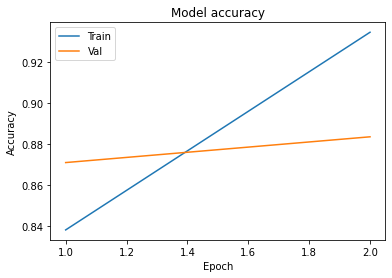

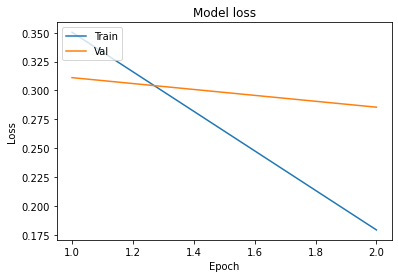

In [ ]:
plot_learningCurve(his, 2)

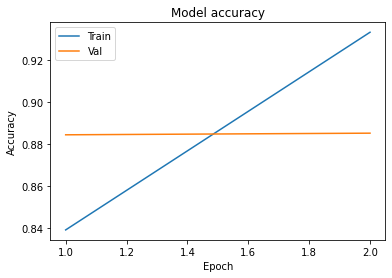

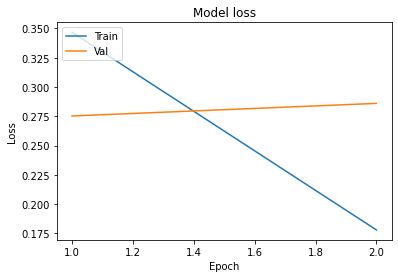

In [ ]:
plot_learningCurve(his2, 2)